<a href="https://colab.research.google.com/github/Sievv/AMPs-Against--PS/blob/main/PS_SMOTE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Class distribution BEFORE SMOTE:
Activity
0    298
1     82
Name: count, dtype: int64


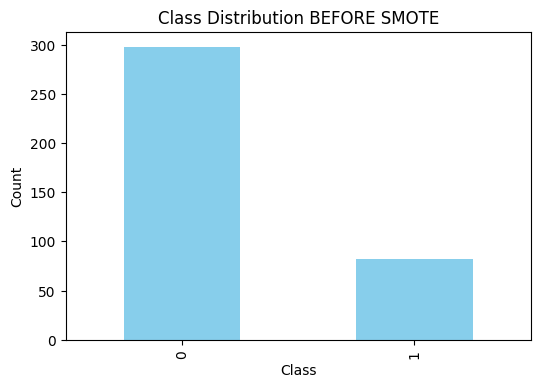


Class distribution AFTER SMOTE:
Activity
1    298
0    298
Name: count, dtype: int64


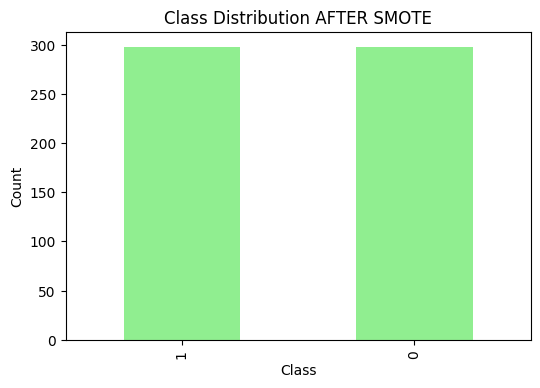


Resampled X_train saved to: /content/drive/MyDrive/PS/PS smote/X_train_resampled.csv
Resampled y_train saved to: /content/drive/MyDrive/PS/PS smote/y_train_resampled.csv

You can now use these resampled datasets to train your model with balanced classes.


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load your original data
X_train = pd.read_csv('/content/drive/MyDrive/PS/PS smote/X_train_features.csv')
y_train = pd.read_csv('/content/drive/MyDrive/PS/PS smote/y_train.csv').squeeze()  # Ensure Series

# Drop 'Sequence' column if present
if 'Sequence' in X_train.columns:
    X_train = X_train.drop('Sequence', axis=1)
else:
    print("Warning: 'Sequence' column not found in X_train.")

# Print class distribution BEFORE SMOTE
print("Class distribution BEFORE SMOTE:")
print(y_train.value_counts())

# Plot before SMOTE
plt.figure(figsize=(6,4))
y_train.value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution BEFORE SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution AFTER SMOTE
print("\nClass distribution AFTER SMOTE:")
print(y_resampled.value_counts())

# Plot after SMOTE
plt.figure(figsize=(6,4))
y_resampled.value_counts().plot(kind='bar', color='lightgreen')
plt.title('Class Distribution AFTER SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Save resampled data to CSV
X_resampled_path = '/content/drive/MyDrive/PS/PS smote/X_train_resampled.csv'
y_resampled_path = '/content/drive/MyDrive/PS/PS smote/y_train_resampled.csv'

pd.DataFrame(X_resampled, columns=X_train.columns).to_csv(X_resampled_path, index=False)
y_resampled.to_csv(y_resampled_path, index=False)

print(f"\nResampled X_train saved to: {X_resampled_path}")
print(f"Resampled y_train saved to: {y_resampled_path}")

print("\nYou can now use these resampled datasets to train your model with balanced classes.")

Training and evaluating on TRAINING data only (SMOTE resampled):

Random Forest Training Set Metrics:
ROC AUC    : 1.0000
PR AUC     : 1.0000
F1 Score   : 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
MCC        : 1.0000

Gradient Boosting Training Set Metrics:
ROC AUC    : 1.0000
PR AUC     : 1.0000
F1 Score   : 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
MCC        : 1.0000

XGBoost Training Set Metrics:
ROC AUC    : 1.0000
PR AUC     : 1.0000
F1 Score   : 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
MCC        : 1.0000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:42:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Svm Training Set Metrics:
ROC AUC    : 0.8008
PR AUC     : 0.8387
F1 Score   : 0.7466
Sensitivity: 0.8255
Specificity: 0.6141
MCC        : 0.4498

Decision Tree Training Set Metrics:
ROC AUC    : 1.0000
PR AUC     : 1.0000
F1 Score   : 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
MCC        : 1.0000

AdaBoost Training Set Metrics:
ROC AUC    : 1.0000
PR AUC     : 1.0000
F1 Score   : 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
MCC        : 1.0000


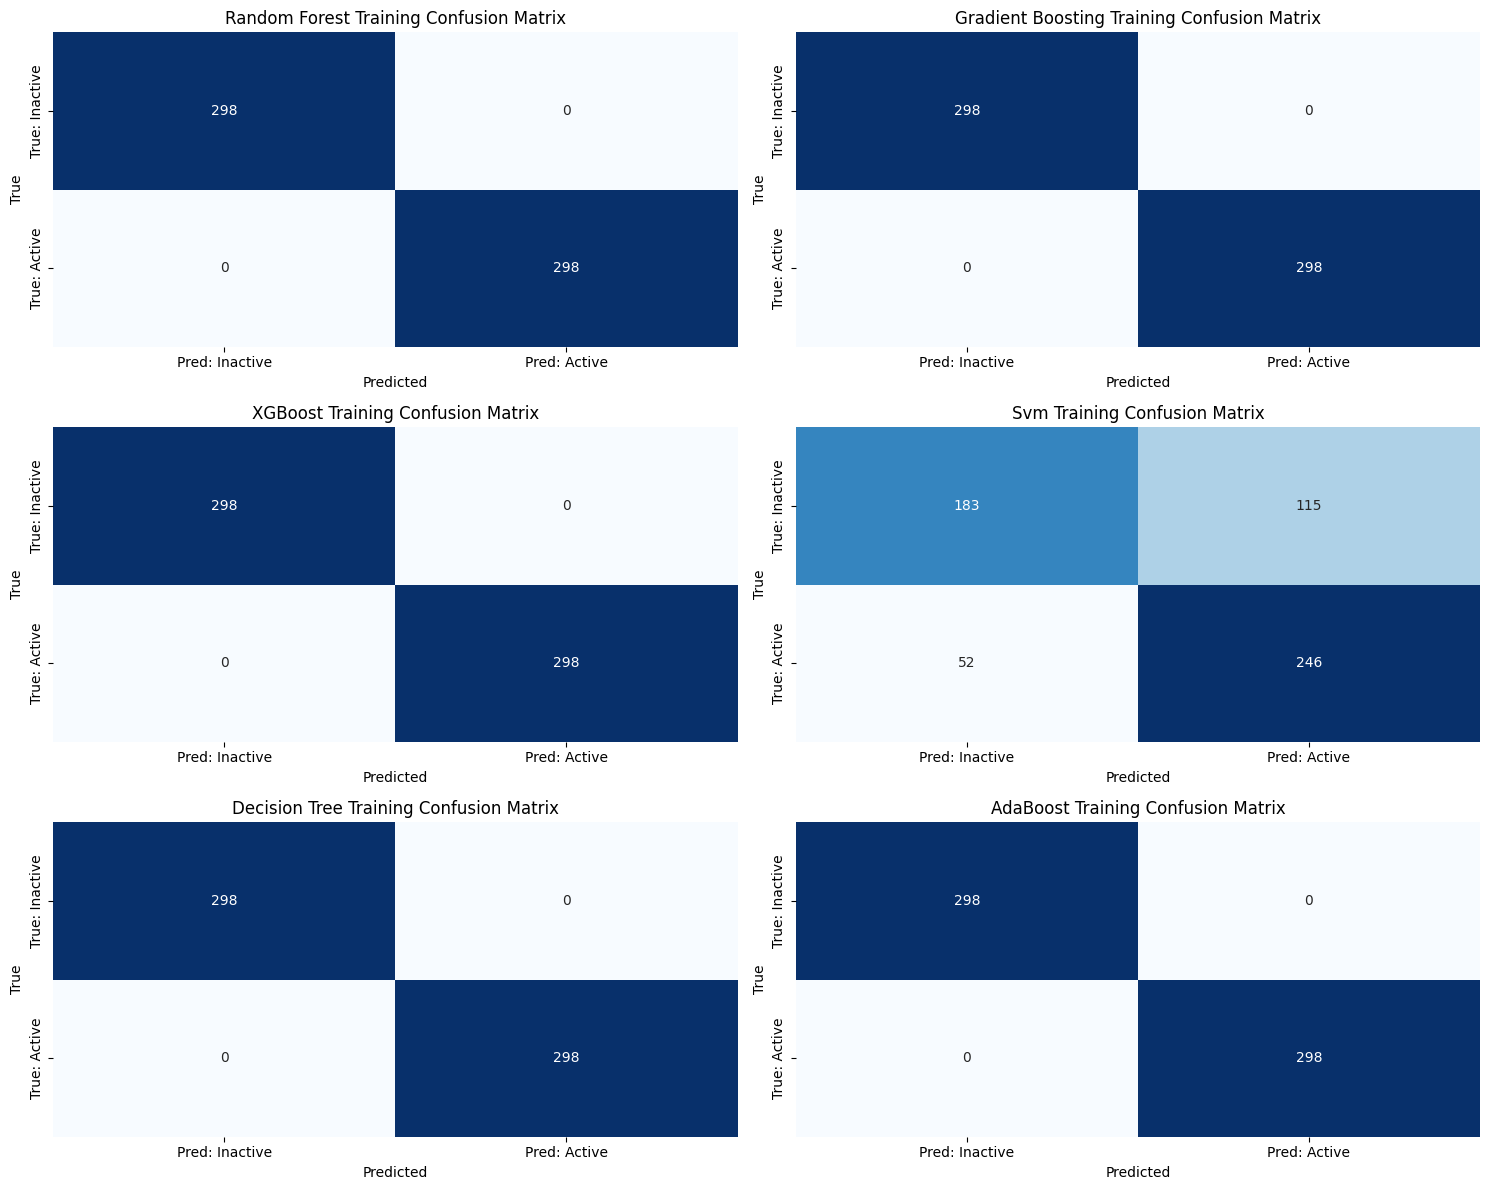

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    confusion_matrix, matthews_corrcoef, recall_score
)
from sklearn.svm import SVC # Import the SVC class

# Load SMOTE-resampled training data
X_train = pd.read_csv('/content/drive/MyDrive/PS/PS smote/X_train_resampled.csv')
y_train = pd.read_csv('/content/drive/MyDrive/PS/PS smote/y_train_resampled.csv').squeeze()

# Drop 'Sequence' if present
if 'Sequence' in X_train.columns:
    X_train = X_train.drop(columns=['Sequence'])

# Define your models (default params or tweak if you want)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'Svm': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

print("Training and evaluating on TRAINING data only (SMOTE resampled):")

plt.figure(figsize=(15, 12))
n_models = len(models)

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)

    # Predict probabilities or fallback to decision_function or predictions
    try:
        y_prob = model.predict_proba(X_train)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_train)
        else:
            y_prob = model.predict(X_train)
            print(f"Warning: {name} does not support predict_proba or decision_function; using predictions for scoring.")

    y_pred = model.predict(X_train)

    # Calculate metrics on training data
    roc_auc = roc_auc_score(y_train, y_prob)
    pr_auc = average_precision_score(y_train, y_prob)
    f1 = f1_score(y_train, y_pred)
    cm = confusion_matrix(y_train, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = recall_score(y_train, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    mcc = matthews_corrcoef(y_train, y_pred)

    print(f"\n{name} Training Set Metrics:")
    print(f"ROC AUC    : {roc_auc:.4f}")
    print(f"PR AUC     : {pr_auc:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"MCC        : {mcc:.4f}")

    # Plot confusion matrix
    plt.subplot((n_models + 1) // 2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'])
    plt.title(f"{name} Training Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

Fitting Random Forest for plotting...
Fitting Gradient Boosting for plotting...
Fitting XGBoost for plotting...
Fitting LightGBM for plotting...
[LightGBM] [Info] Number of positive: 298, number of negative: 298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2436
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:42:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting AdaBoost for plotting...
Fitting SVM for plotting...


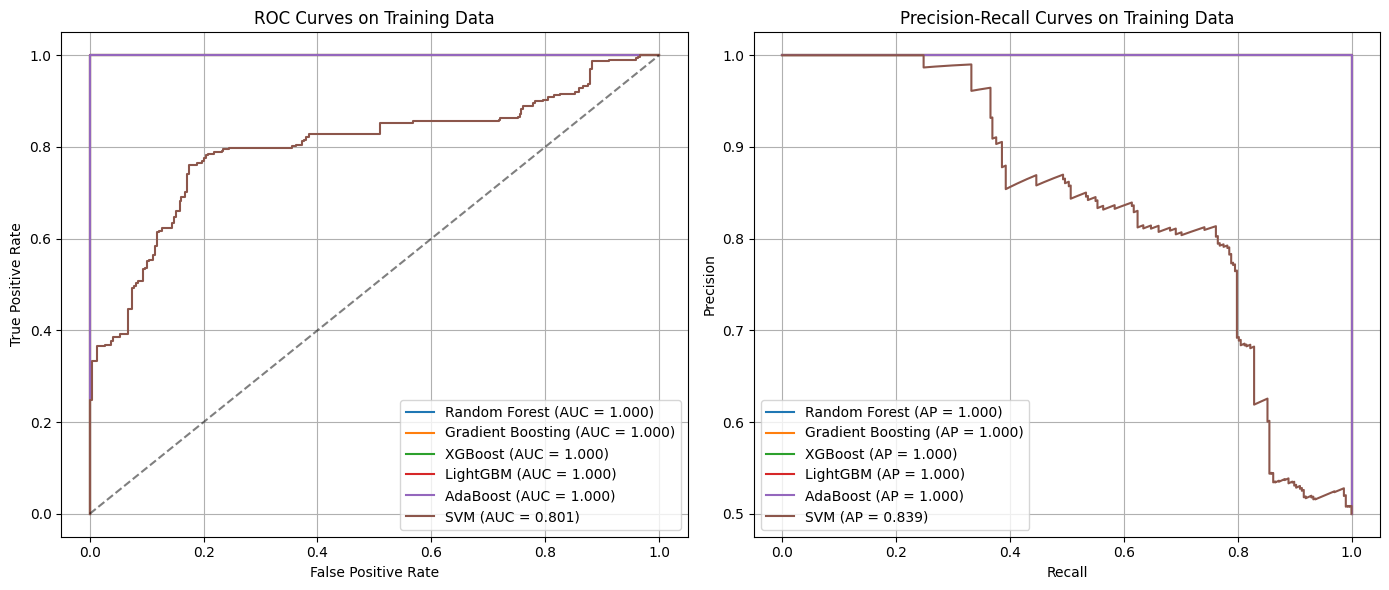

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC

# Assuming X_train and y_train are already defined and preprocessed

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

plt.figure(figsize=(14, 6))
colors = plt.get_cmap('tab10').colors

# ROC Curve plot
plt.subplot(1, 2, 1)
for i, (name, model) in enumerate(models.items()):
    # Fit the model before predicting
    print(f"Fitting {name} for plotting...")
    model.fit(X_train, y_train)

    # Predict probabilities
    try:
        y_scores = model.predict_proba(X_train)[:, 1]
    except AttributeError:
        # Handle models that don't have predict_proba (like some SVC configurations)
        if hasattr(model, 'decision_function'):
             y_scores = model.decision_function(X_train)
        else:
            # Fallback for models without predict_proba or decision_function
            y_scores = model.predict(X_train)
            print(f"Warning: {name} does not support predict_proba or decision_function; using predictions.")


    fpr, tpr, _ = roc_curve(y_train, y_scores)
    auc = roc_auc_score(y_train, y_scores)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})", color=colors[i])

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.title("ROC Curves on Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)

# Precision-Recall Curve plot
plt.subplot(1, 2, 2)
for i, (name, model) in enumerate(models.items()):

    try:
        y_scores = model.predict_proba(X_train)[:, 1]
    except AttributeError:
         if hasattr(model, 'decision_function'):
             y_scores = model.decision_function(X_train)
         else:
            y_scores = model.predict(X_train)
            print(f"Warning: {name} does not support predict_proba or decision_function; using predictions.")

    precision, recall, _ = precision_recall_curve(y_train, y_scores)
    pr_auc = average_precision_score(y_train, y_scores)
    plt.plot(recall, precision, label=f"{name} (AP = {pr_auc:.3f})", color=colors[i])

plt.title("Precision-Recall Curves on Training Data")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()
plt.show()

predict test set

Successfully loaded model: Random Forest
Successfully loaded model: Gradient Boosting
Successfully loaded model: Xgboost
Successfully loaded model: Adaboost

Random Forest Test Metrics:
Accuracy   : 0.9579
F1 Score   : 0.9000
Precision  : 0.9000
Recall     : 0.9000
MCC        : 0.8733
ROC AUC    : 0.9960
PR AUC     : 0.9861

Gradient Boosting Test Metrics:
Accuracy   : 0.9789
F1 Score   : 0.9524
Precision  : 0.9091
Recall     : 1.0000
MCC        : 0.9407
ROC AUC    : 1.0000
PR AUC     : 1.0000

Xgboost Test Metrics:
Accuracy   : 0.9789
F1 Score   : 0.9500
Precision  : 0.9500
Recall     : 0.9500
MCC        : 0.9367
ROC AUC    : 0.9953
PR AUC     : 0.9838

Adaboost Test Metrics:
Accuracy   : 1.0000
F1 Score   : 1.0000
Precision  : 1.0000
Recall     : 1.0000
MCC        : 1.0000
ROC AUC    : 1.0000
PR AUC     : 1.0000


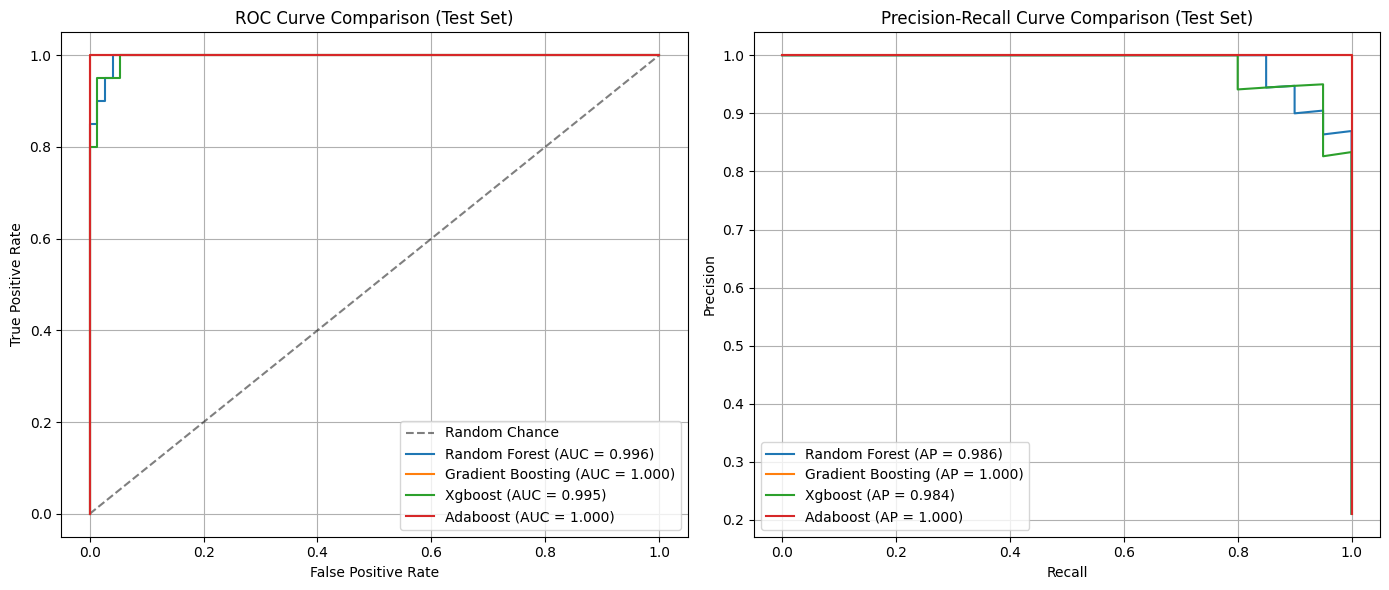

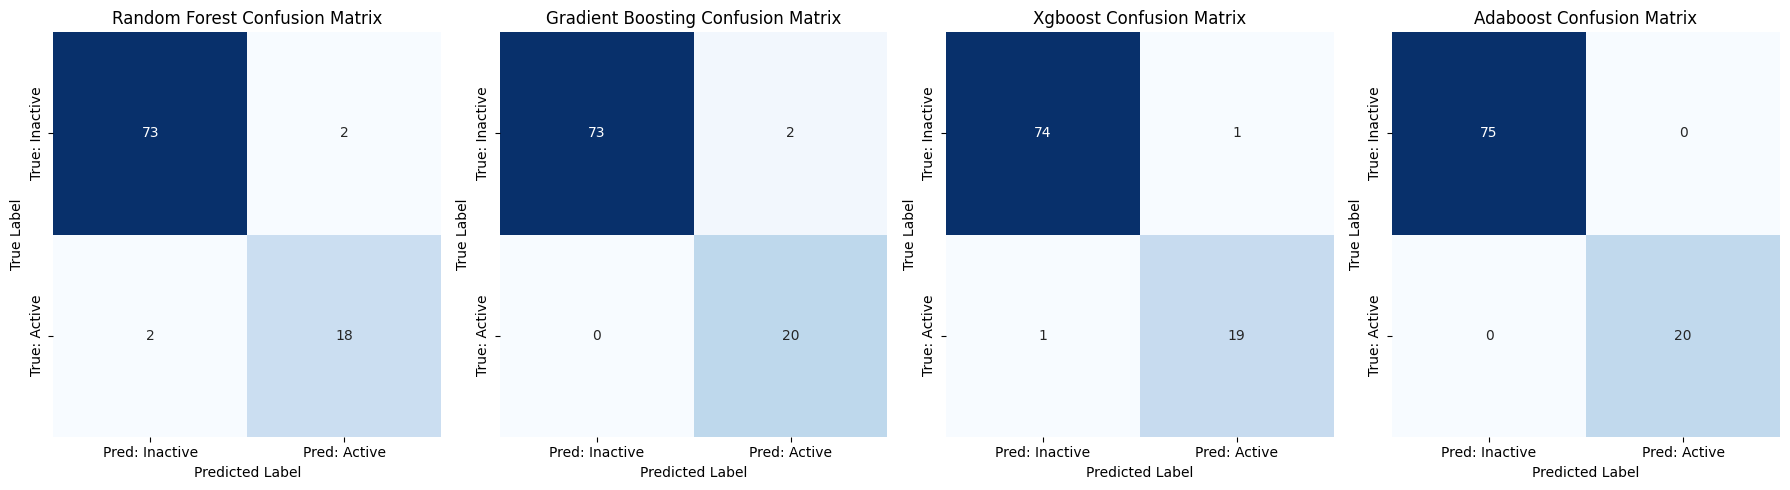

In [44]:
import joblib
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, precision_recall_curve, roc_auc_score, average_precision_score,
    confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef
)
import numpy as np

# Directory containing the saved models (adjust path if needed)
model_dir = '/content/drive/MyDrive/PS/PS smote/pre_trained_models/'

# List of model filenames expected to be saved in model_dir
model_files = [
    'random_forest_smote_model.pkl',
    'gradient_boosting_smote_model.pkl',
    'xgboost_smote_model.pkl',
    'lightgbm_smote_model.pkl',
    'adaboost_smote_model.pkl',
    'svm_smote_model.pkl'
]

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/PS/PS smote/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/PS/PS smote/y_test.csv').squeeze()

# Drop 'Sequence' column if it exists
if 'Sequence' in X_test.columns:
    X_test = X_test.drop(columns=['Sequence'])

# Load models
models = {}
for filename in model_files:
    model_name = filename.replace('_smote_model.pkl', '').replace('_', ' ').title()
    model_path = os.path.join(model_dir, filename)
    try:
        models[model_name] = joblib.load(model_path)
        print(f"Successfully loaded model: {model_name}")
    except FileNotFoundError:
        print(f"Warning: Model file not found at {model_path}. Skipping {model_name}.")

# Prepare plot for ROC and PR curves
plt.figure(figsize=(14, 6))
colors = plt.get_cmap('tab10').colors

# ROC curve subplot setup
plt.subplot(1, 2, 1)
plt.title('ROC Curve Comparison (Test Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Chance')

# PR curve subplot setup
plt.subplot(1, 2, 2)
plt.title('Precision-Recall Curve Comparison (Test Set)')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Store confusion matrices to plot later
confusion_matrices = []

# Evaluate each loaded model
if models:
    for i, (name, model) in enumerate(models.items()):
        # Predict probabilities for positive class (class 1)
        try:
            y_prob = model.predict_proba(X_test)[:, 1]
        except AttributeError:
            if hasattr(model, 'decision_function'):
                y_prob = model.decision_function(X_test)
            else:
                y_prob = model.predict(X_test)
                print(f"Warning: {name} does not support predict_proba or decision_function. "
                      "AUC/AP may be inaccurate.")

        # Predict class labels
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        pr_auc = average_precision_score(y_test, y_prob)

        print(f"\n{name} Test Metrics:")
        print(f"Accuracy   : {accuracy:.4f}")
        print(f"F1 Score   : {f1:.4f}")
        print(f"Precision  : {precision:.4f}")
        print(f"Recall     : {recall:.4f}")
        print(f"MCC        : {mcc:.4f}")
        print(f"ROC AUC    : {roc_auc:.4f}")
        print(f"PR AUC     : {pr_auc:.4f}")

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', color=colors[i % len(colors)])

        # Plot PR curve
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
        plt.subplot(1, 2, 2)
        plt.plot(recall_curve, precision_curve, label=f'{name} (AP = {pr_auc:.3f})', color=colors[i % len(colors)])

        # Collect confusion matrix
        confusion_matrices.append((name, confusion_matrix(y_test, y_pred)))

    plt.subplot(1, 2, 1)
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.legend(loc='lower left')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Plot confusion matrices side by side
    if confusion_matrices:
        plt.figure(figsize=(min(18, 5 * len(confusion_matrices)), 5))
        for i, (name, cm) in enumerate(confusion_matrices, 1):
            plt.subplot(1, len(confusion_matrices), i)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                        xticklabels=['Pred: Inactive', 'Pred: Active'],
                        yticklabels=['True: Inactive', 'True: Active'])
            plt.title(f'{name} Confusion Matrix')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')

        plt.tight_layout()
        plt.show()
else:
    print("No models were loaded. Cannot plot metrics or confusion matrices.")


In [49]:
# Directory to save the newly trained models
save_dir = '/content/drive/MyDrive/PS/PS smote/pre_trained_models/'
!mkdir -p "$save_dir"

for i, (name, model) in enumerate(models.items(), 1):
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Save the trained model
    model_filename = f"{name.replace(' ', '_').lower()}_smote_model.pkl"
    model_save_path = save_dir + model_filename
    joblib.dump(model, model_save_path)
    saved_model_paths.append(model_save_path)
    print(f"Saved {name} to {model_save_path}")


Training Random Forest...
Saved Random Forest to /content/drive/MyDrive/PS/PS smote/pre_trained_models/random_forest_smote_model.pkl
Training Gradient Boosting...
Saved Gradient Boosting to /content/drive/MyDrive/PS/PS smote/pre_trained_models/gradient_boosting_smote_model.pkl
Training Xgboost...
Saved Xgboost to /content/drive/MyDrive/PS/PS smote/pre_trained_models/xgboost_smote_model.pkl
Training Adaboost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:43:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Saved Adaboost to /content/drive/MyDrive/PS/PS smote/pre_trained_models/adaboost_smote_model.pkl



Feature Importance for Random Forest:


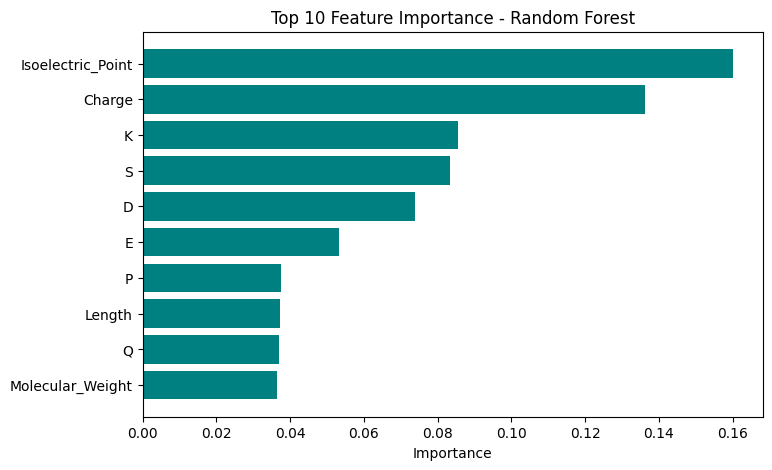


Feature Importance for Gradient Boosting:


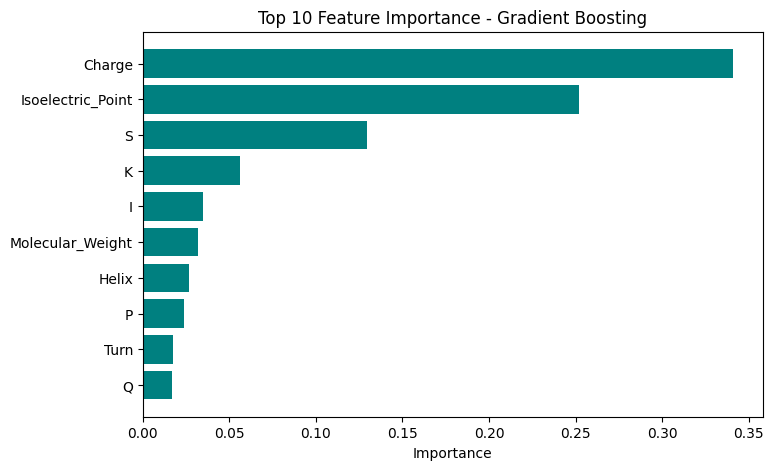


Feature Importance for XGBoost:


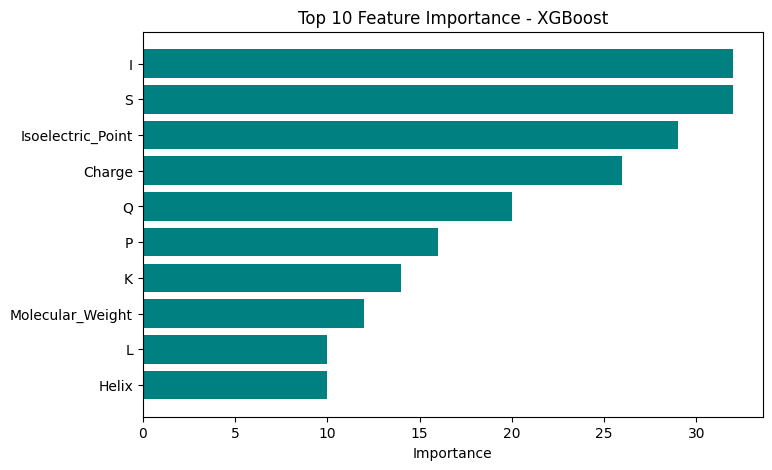


Feature Importance for AdaBoost:


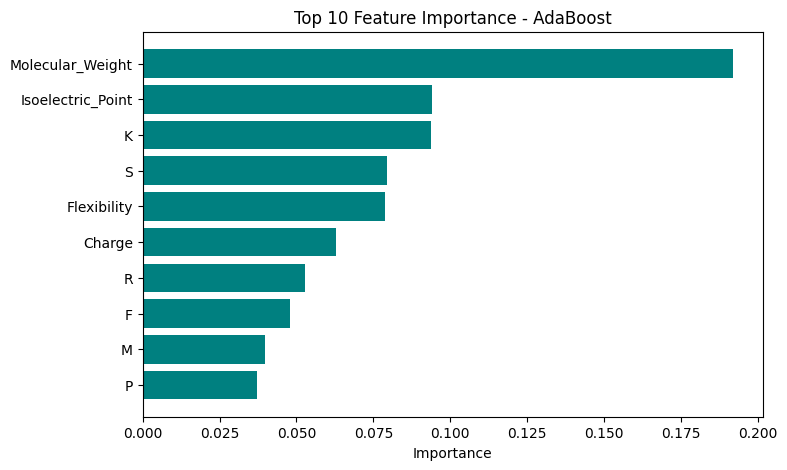

In [46]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train is already loaded
feature_names = X_train.columns.tolist()

# Dictionary of models and their saved paths
tree_models = {
    'Random Forest': '/content/drive/MyDrive/PS/PS smote/pre_trained_models/random_forest_smote_model.pkl',
    'Gradient Boosting': '/content/drive/MyDrive/PS/PS smote/pre_trained_models/gradient_boosting_smote_model.pkl',
    'XGBoost': '/content/drive/MyDrive/PS/PS smote/pre_trained_models/xgboost_smote_model.pkl',
    'AdaBoost': '/content/drive/MyDrive/PS/PS smote/pre_trained_models/adaboost_smote_model.pkl'
}

for name, path in tree_models.items():
    model = joblib.load(path)
    print(f"\nFeature Importance for {name}:")

    if name == 'XGBoost':
        booster = model.get_booster()
        # Map XGBoost feature codes (f0, f1, ...) to actual feature names
        fmap = {f'f{i}': feature_names[i] for i in range(len(feature_names))}
        imp = booster.get_score(importance_type='weight')

        # Build DataFrame, handle missing features by setting importance to 0
        imp_df = pd.DataFrame({
            'Feature': [fmap.get(k, k) for k in imp.keys()],
            'Importance': list(imp.values())
        })
        imp_df = imp_df.sort_values(by='Importance', ascending=False)
    else:
        # Use feature_importances_ attribute
        imp = model.feature_importances_
        imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': imp})
        imp_df = imp_df.sort_values(by='Importance', ascending=False)

    # Plot top 10 important features
    imp_df_top = imp_df.head(10)
    plt.figure(figsize=(8, 5))
    plt.barh(imp_df_top['Feature'][::-1], imp_df_top['Importance'][::-1], color='teal')
    plt.xlabel('Importance')
    plt.title(f'Top 10 Feature Importance - {name}')
    plt.show()


In [47]:
!pip install lime

In [48]:
import lime
import lime.lime_tabular
import joblib
import numpy as np
import pandas as pd

# Load your Random Forest model (or any model you want to explain)
rf_model = joblib.load('/content/drive/MyDrive/PS/PS smote/pre_trained_models/random_forest_smote_model.pkl')

# Load test data features and labels
X_test = pd.read_csv('/content/drive/MyDrive/PS/PS smote/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/PS/PS smote/y_test.csv').squeeze()

# Drop 'Sequence' column if exists
if 'Sequence' in X_test.columns:
    X_test = X_test.drop(columns=['Sequence'])

feature_names = X_test.columns.tolist()
class_names = ['Inactive', 'Active']

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

# Select indices for 2 samples of class 0 and 2 of class 1
idx_class0 = [i for i, val in enumerate(y_test) if val == 0][:2]
idx_class1 = [i for i, val in enumerate(y_test) if val == 1][:2]
sample_indices = idx_class0 + idx_class1

for idx in sample_indices:
    print(f"\nExplaining prediction for test sample index {idx} (True class: {class_names[y_test.iloc[idx]]})")

    # Explain instance
    exp = explainer.explain_instance(
        data_row=X_test.iloc[idx],
        predict_fn=rf_model.predict_proba,
        num_features=10  # Number of features to show in explanation
    )

    # Show explanation as list
    for feature, weight in exp.as_list():
        print(f"{feature}: {weight:.4f}")

    # Optional: visualize explanation (opens in notebook or saves)
    exp.show_in_notebook(show_table=True)


Explaining prediction for test sample index 0 (True class: Inactive)
Isoelectric_Point <= 7.99: -0.1419
Charge <= 1.00: -0.1383
S > 7.69: -0.0840
E > 5.88: -0.0702
4.32 < K <= 11.79: -0.0555
N > 3.45: -0.0449
M > 1.35: -0.0374
Y > 3.03: -0.0293
0.00 < D <= 4.28: -0.0217
Length > 32.00: -0.0214


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.


Explaining prediction for test sample index 1 (True class: Inactive)


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Charge <= 1.00: -0.1452
Isoelectric_Point <= 7.99: -0.1395
D > 4.28: -0.0974
S <= 0.00: 0.0776
P > 6.13: -0.0704
K <= 4.32: -0.0651
E <= 0.00: 0.0538
M > 1.35: -0.0399
Q <= 0.00: 0.0377
N <= 0.00: 0.0307


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:427: FutureWarning: Series._

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.


Explaining prediction for test sample index 3 (True class: Active)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:427: FutureWarning: Series._

K > 23.75: 0.1060
4.00 < Charge <= 6.00: 0.0990
9.73 < Isoelectric_Point <= 10.50: 0.0906
D <= 0.00: 0.0870
S > 7.69: -0.0797
E <= 0.00: 0.0543
P <= 0.00: 0.0536
I > 8.48: 0.0446
N > 3.45: -0.0384
Q <= 0.00: 0.0372


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.


Explaining prediction for test sample index 7 (True class: Active)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:427: FutureWarning: Series._

Isoelectric_Point > 10.50: 0.1118
Charge > 6.00: 0.1018
S <= 0.00: 0.0781
D <= 0.00: 0.0779
E <= 0.00: 0.0620
M <= 0.00: 0.0406
P <= 0.00: 0.0400
11.79 < K <= 23.75: 0.0370
I > 8.48: 0.0355
Q <= 0.00: 0.0317
